In [4]:
#libreria de entrada salida de datos
import scipy.io as sio #carga señales .mat
#transforamda rapida de fourier, para cuantificar las oscilaciones
from scipy import stats #traer la funcion de la transformada de fourier 
#manejo de tensores ndarray
import numpy as np #manejar los datos, que es una matriz (tensor: 2 dim)
#graficar
import pandas as pd #graficar
import seaborn as sns  #graficar
import matplotlib.pyplot as plt #ajustes adicionales a los gráficos.

In [6]:
#estoy cargando unos datos que fueron previamente recolectados
#usamos el sio para cargar los datos
path = r"C:\Users\griss\Downloads\C001R_EP_reposo.mat"
mat_contents = sio.loadmat(path) #asigna el contenido de ese archivo en el PATH #loadmath carga un archivo .mat
print(f'La variable cargada es del tipo: {type(mat_contents)}') #tipo de datos es diccionario en este caso 
print(f'las llaves son: {mat_contents.keys()}') #como se que es un diccionario, voy a pedirle las llaves

La variable cargada es del tipo: <class 'dict'>
las llaves son: dict_keys(['__header__', '__version__', '__globals__', 'data'])


In [7]:
senal = mat_contents['data'] #acceder a los datos 
print("dimensión: ",senal.ndim) #como esta formada la señal, miro dimension y forma que me da info de como es la señal
print("Forma: ",senal.shape)

dimensión:  3
Forma:  (8, 2000, 180)


In [8]:
#COMO HACEMOS CONTINUA
sensores = senal.shape[0] #primera posicion, dependiendo de como 
puntos = senal.shape[1] 
epocas = senal.shape[2]

In [9]:
#reshape(senal_original, forma_nueva)
senal_continua = np.reshape(senal,(sensores,puntos*epocas),order = 'F') #reshape cambia la forma de 2d a 3d, de 3d a 2d, primero la señal original y luego la señal completa
print(senal_continua.shape) 

(8, 360000)


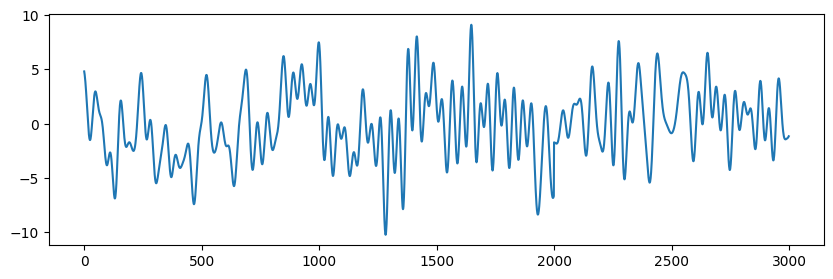

In [16]:
fig = plt.figure(figsize=(10,3))
plt.plot(senal_continua[0,0:3000]) #hasta donde va la señal
plt.show()

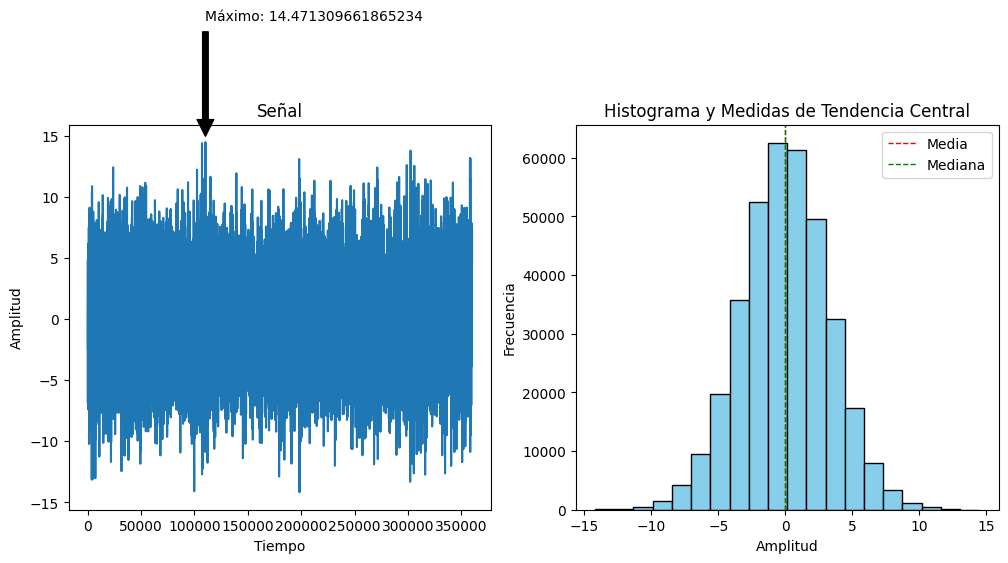

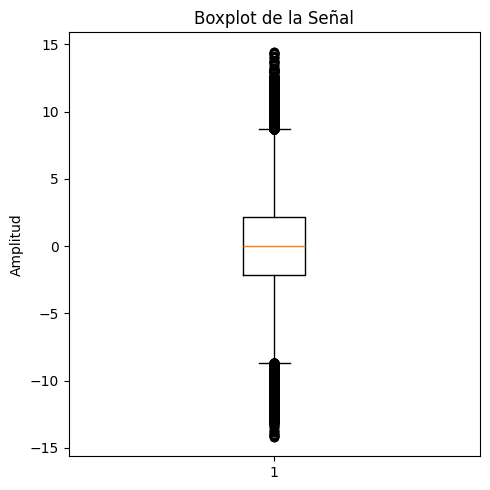

In [12]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

def cargar_y_graficar_mat(filename,sensor):
    # Cargar la señal desde el archivo .mat
    data = scipy.io.loadmat(filename)
    signal = data['data']
    senal_continua = np.reshape(signal,(signal.shape[0],signal.shape[1]*signal.shape[2]),order = 'F') 

    # Encontrar el índice del valor máximo y su valor
    indice_maximo = np.argmax(senal_continua[sensor,:])
    valor_maximo = np.max(senal_continua[sensor,:])
    
    # Crear el subplot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Graficar la señal en el primer subplot
    ax1.plot(senal_continua[sensor,:])
    ax1.set_xlabel('Tiempo')
    ax1.set_ylabel('Amplitud')
    ax1.set_title('Señal')
    
    # Agregar la flecha en el punto máximo
    ax1.annotate(f'Máximo: {valor_maximo}', 
                 xy=(indice_maximo, valor_maximo), 
                 xytext=(indice_maximo, valor_maximo + 10),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
    # Graficar histograma y etiquetar medidas de tendencia central en el segundo subplot
    ax2.hist(senal_continua[sensor,:], bins=20, color='skyblue', edgecolor='black')
    ax2.axvline(np.mean(senal_continua[sensor,:]), color='red', linestyle='dashed', linewidth=1, label='Media')
    ax2.axvline(np.median(senal_continua[sensor,:]), color='green', linestyle='dashed', linewidth=1, label='Mediana')
    ax2.legend()
    ax2.set_xlabel('Amplitud')
    ax2.set_ylabel('Frecuencia')
    ax2.set_title('Histograma y Medidas de Tendencia Central')
    
    # Añadir un boxplot en un tercer subplot
    fig, ax3 = plt.subplots(figsize=(5, 5))
    ax3.boxplot(senal_continua[sensor,:])
    ax3.set_ylabel('Amplitud')
    ax3.set_title('Boxplot de la Señal')
    
    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
cargar_y_graficar_mat(r"C:\Users\griss\Downloads\C001R_EP_reposo.mat",0)

C:\Users\griss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\griss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


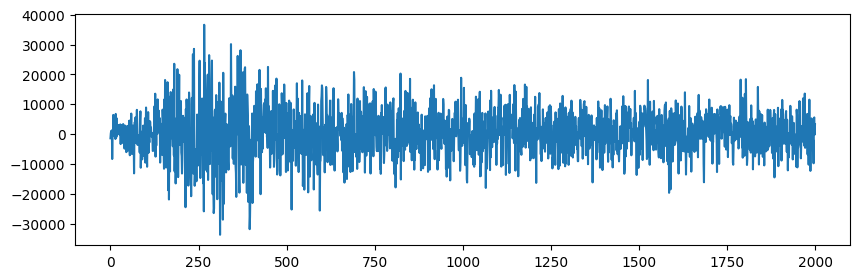

In [13]:
from scipy.fft import fft
transformada = fft(senal_continua[0,:]) #a la transformada le paso desde el comienzo hasta el final 
fig = plt.figure(figsize=(10,3))
plt.plot(transformada[0:2000])
plt.show()

<Axes: ylabel='Density'>

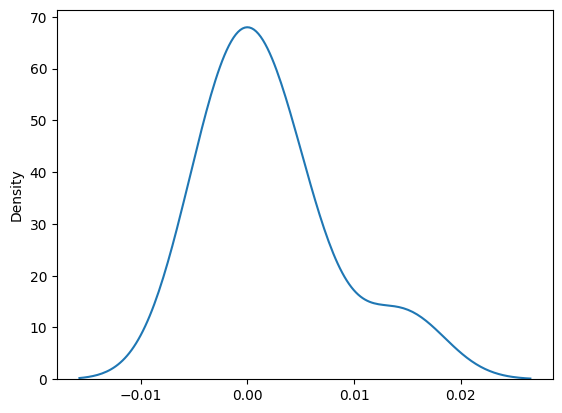

In [14]:
#Vamos a sacar el promedio,la moda y la mediana a cada uno de los sensores
pd_senal=pd.DataFrame(senal_continua)
promedio=pd_senal.mean(axis=1)
mediana=pd_senal.median(axis=1)
moda=pd_senal.apply(lambda x : stats.mode(x), axis=1)
sns.kdeplot(promedio) #muestra el promedio de la imagen 

In [ ]:
import cv2

img = cv2.imread(r"C:\Users\M413UA\Documents\ISABELLA\Catedra\Material_info\Info-2\Unidad 2\OpenCV\brain.png", cv2.IMREAD_COLOR)
cv2.imshow('Imagen Original', img)
#Esperar a que se presione una tecla y cerrar la ventana
cv2.waitKey(0) #genera un delay para que no se cierre
cv2.destroyAllWindows()

In [ ]:
#Podemos ver la forma de la imagen
img.shape

# Convertir la imagen a escala de colores cálidos
colormap = cv2.applyColorMap(img, cv2.COLORMAP_HOT)

# Convertir la imagen a escala de grises
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mostrar la imagen en escala de grises
cv2.imshow('Imagen cálida', colormap)
cv2.imshow('Imagen en Grises', gris)
# Esperar a que se presione una tecla y cerrar la ventana
cv2.waitKey(0)
cv2.destroyAllWindows()
# Aplicar un filtro Gaussiano para reducir ruido
img_filtrada = cv2.GaussianBlur(gris, (5, 5),0)

# Mostrar la imagen filtrada
cv2.imshow('Imagen Filtrada', img_filtrada)

# Esperar a que se presione una tecla y cerrar la ventana
cv2.waitKey(0)
cv2.destroyAllWindows()
# Detectar bordes utilizando el operador de Canny
bordes = cv2.Canny(img_filtrada, 100, 200)

# Mostrar los bordes detectados
cv2.imshow('Bordes Detectados', bordes)

# Esperar a que se presione una tecla y cerrar la ventana
cv2.waitKey(0)
cv2.destroyAllWindows()
# Detectar bordes utilizando el operador de Canny
img1=cv2.imread(r"C:\Users\M413UA\Documents\ISABELLA\Catedra\Material_info\Info-2\Unidad 2\OpenCV\imagen.jpg", cv2.IMREAD_COLOR)
# Mostrar imagen
cv2.imshow('Mario', img1)

bordes = cv2.Canny(img1, 30, 200)

# Mostrar los bordes detectados
cv2.imshow('Bordes Detectados', bordes)

# Esperar a que se presione una tecla y cerrar la ventana
cv2.waitKey(0)
cv2.destroyAllWindows()